# <html>

    
<div  style="background-color:w; color:#636363;border:darkgoldenrod; border-width:5px; border-style:solid;">

    
<p><center><img src="https://drive.google.com/thumbnail?id=1yPGYO8HkTanlqsIXozDIUvUVuvawAdG_" width ="6%"  /><font size=8> <b>Modelo Classificação Tipo de Vidro</b></font> </p>
<p ><font size=6><center>Ives Tulio</font> </p>
<p ><font size=4><center><b>email:</b> ivestulio@gmail.com <br> 
<b>Linkedin:</b> in/ives-tulio/<br>
<b>GitHub:</b> ivestulio</p>

</div>


# Descrição do Projeto

## Dados:

Dados: Dados de 10 parâmetros da composição de amostras de vidro e classificação em 7 tipos 

**Parâmetros:**
* RI (Índice de Refração) 
* Na (Sódio)
* Mg (Magnésio)
* Al (Alumíno)
* Si (Silício)
* K (Potássio)
* Ca (Cálcipo)
* Ba (Bário)
* Fe (Ferro)

**Tipos de Vidros**

1. buildingwindowsfloatprocessed
2. buildingwindowsnonfloatprocessed -
3. vehiclewindowsfloatprocessed
4. vehiclewindowsnonfloatprocessed (ausente)
5. containers
6. tableware
7. headlamps


**Fonte:** 
B. German
Central Research Establishment
Home Office Forensic Science Service
Aldermaston, Reading, Berkshire RG7 4PN

## Avaliações

* Qual a relação entre os parâmetros apresentados e os tipos de vidros no qual foi dividido?
* Podemos empregar um modelo de Classificação Supervisionado 



<div style="background-color:khaki; color:black;">
    <h2><center>Bibliotecas:</center></h2>
</div>

In [1]:
# Manipulação de dados:
import pandas as pd 



# Visualização Gráfica:
import seaborn as sns
import matplotlib.pyplot as plt



# Pré-processamento de dados: 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

# Modelos de Classificação 


from sklearn.neighbors import KNeighborsClassifier


# Evolução :
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold


<div style="background-color:khaki; color:black;">
    <h2><center>Importando os Dados</center></h2>
</div>

In [2]:
ds = pd.read_csv("../input/glass/glass.csv")


<div style="background-color:khaki; color:black;">
    <h2><center>Resumo dos Dados</center></h2>
</div>

In [3]:
!pip install pandas_profiling 

In [4]:
from pandas_profiling import ProfileReport 

In [5]:
profile = ProfileReport(ds, title="Pandas Profiling")

In [6]:
ds.profile_report()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
ds.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [8]:
ds.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [10]:
ds['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


<div style="background-color:khaki; color:black;">
    <h2><center>Tratamento dos Dados</center></h2>
</div>

In [11]:
# Valores nulos:
ds.isnull().sum()


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

## **OBS:**
* Os dados não possuem valores nulos
* Todos os valores são numéricos

<div style="background-color:khaki; color:black;">
    <h2><center>Visualização dos Dados:</center></h2>
</div>

In [12]:
data1 = ds.groupby(["Type"]).mean()
data1

RI         Na        Mg        Al         Si         K         Ca  \
Type                                                                            
1     1.518718  13.242286  3.552429  1.163857  72.619143  0.447429   8.797286   
2     1.518619  13.111711  3.002105  1.408158  72.598026  0.521053   9.073684   
3     1.517964  13.437059  3.543529  1.201176  72.404706  0.406471   8.782941   
5     1.518928  12.827692  0.773846  2.033846  72.366154  1.470000  10.123846   
6     1.517456  14.646667  1.305556  1.366667  73.206667  0.000000   9.356667   
7     1.517116  14.442069  0.538276  2.122759  72.965862  0.325172   8.491379   

            Ba        Fe  
Type                      
1     0.012714  0.057000  
2     0.050263  0.079737  
3     0.008824  0.057059  
5     0.187692  0.060769  
6     0.000000  0.000000  
7     1.040000  0.013448

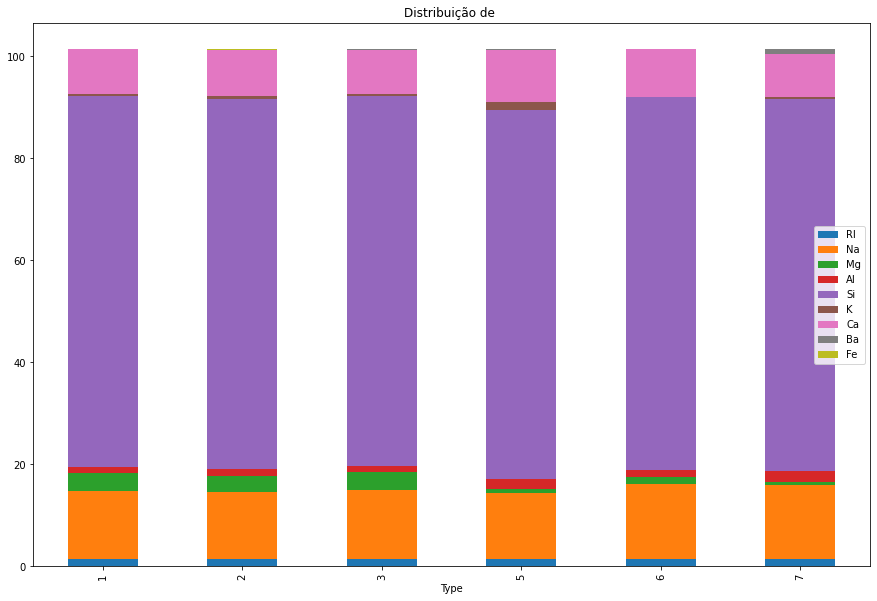

In [13]:
data1.plot(kind="bar", stacked=True, figsize=(15,10), title="Distribuição de ", legend=True,width=0.5)
plt.legend(loc=5)

<AxesSubplot:>

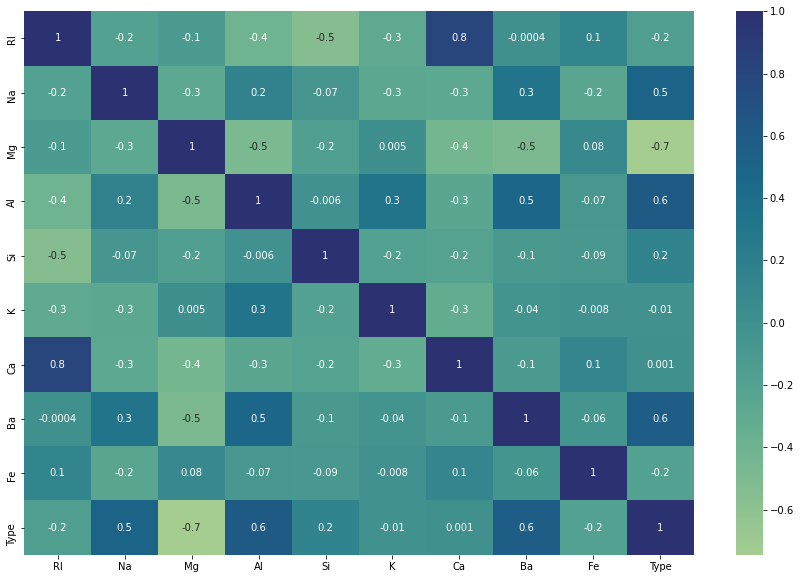

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(ds.corr(), annot=True, fmt=".1g", cmap="crest")


## **OBS:**
* 


<div style="background-color:khaki; color:black;">
    <h2><center>Modelagem</center></h2>
</div>

In [15]:
# Dividindo os dados:
# X :
X = ds.drop("Type", axis=1)
X.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0

In [16]:
# y :

y = ds["Type"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [17]:
x_train, x_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=14)

In [18]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
KNeighborsClassifierScore = knc.score(x_test,y_test)
print(f"Precisão do Modelo KNC:{KNeighborsClassifierScore}")

Precisão do Modelo KNC:0.7407407407407407



<div style="background-color:khaki; color:black;">
    <h2><center>Ajustes</center></h2>
</div>

In [20]:
# Grid Search and Space:
model = KNeighborsClassifier()
params={'n_neighbors':list(range(1,21)),
        'metric':['euclidean','manhattan','minkowski'],
        'weights':['uniform','distance']
}
# Evaluation:

cv = RepeatedStratifiedKFold(n_splits = 5,n_repeats=2)
                
# Search:
Score=[] 
search = GridSearchCV(model,params )
   

In [21]:
result = search.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.71875
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}



<div style="background-color:khaki; color:black;">
    <h2><center>Modelo Final</center></h2>
</div>

In [22]:
knc = KNeighborsClassifier(n_neighbors = 1, metric="euclidean", weights="uniform")
knc.fit(x_train,y_train)
Tipo = knc.predict(x_test)